<a href="https://colab.research.google.com/github/MoffatKirui/DengAI/blob/main/DengAI_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **DengAI: Predicting Disease Spread**

---



**GROUP MEMBERS:**

1. MOFFAT KIRUI

2. NORAH EKUTAN

3. LAWRENCE ONDIEKI

4. NJOKI MBUGUA


## 1. Defining the Question

### a) Specifying the question

>  Using environmental data collected by various U.S. Federal Government agencies, Predict the number of dengue fever cases reported each week in San Juan, Puerto Rico and Iquitos, Peru

### b) Defining the metric of success

> The project will be considered a success if we correctly predict the number of dengue fever cases reported each week in San Juan, Puerto Rico and Iquitos, Peru. Our goal will be to build a model that best optimizes the mean absolute error(MAE).

### c) Understanding the context

>Dengue fever is a mosquito-borne disease that occurs in tropical and sub-tropical parts of the world. In mild cases, symptoms are similar to the flu: fever, rash, and muscle and joint pain. In severe cases, dengue fever can cause severe bleeding, low blood pressure, and even death.
Because it is carried by mosquitoes, the transmission dynamics of dengue are related to climate variables such as temperature and precipitation. Although the relationship to climate is complex, a growing number of scientists argue that climate change is likely to produce distributional shifts that will have significant public health implications worldwide.
An understanding of the relationship between climate and dengue dynamics can improve research initiatives and resource allocation to help fight life-threatening pandemics.


### d) Recording the experimental design

* > Reading and previewing the data
* > Data preparation by dealing with missing values, duplicates 



In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_train = pd.read_csv('/content/dengue_features_train.csv')
df_train

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,296.825714,309.7,294.5,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,296.452857,308.5,291.9,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,295.501429,305.5,292.4,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,297.521429,295.324286,306.1,291.9,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0


In [ ]:
df_test = pd.read_csv('/content/dengue_features_test.csv')
df_test

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.018900,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,301.1,296.4,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.018000,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,300.8,296.7,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.001500,NaN,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,296.4,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,303.0,296.9,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.056800,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,302.3,297.3,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,iq,2013,22,2013-05-28,0.301471,0.380029,0.280629,0.383186,41.12,297.774286,298.964286,295.638571,305.5,292.7,67.60,89.990000,41.12,17.185714,10.100000,27.400000,9.050000,32.6,21.8,33.0
412,iq,2013,23,2013-06-04,0.247600,0.296343,0.285371,0.350357,71.52,297.167143,298.328571,295.845714,306.3,291.6,45.70,93.891429,71.52,17.448571,9.657143,27.520000,10.720000,33.8,21.4,68.0
413,iq,2013,24,2013-06-11,0.238729,0.251029,0.252586,0.249771,78.96,295.831429,296.607143,294.894286,304.6,290.7,45.22,94.967143,78.96,16.410000,7.385714,27.200000,10.075000,32.6,21.6,93.2
414,iq,2013,25,2013-06-18,0.310429,0.302700,0.406614,0.403943,39.54,295.778571,297.400000,293.648571,305.9,292.5,4.70,89.057143,39.54,15.137143,8.228571,26.700000,8.480000,32.2,21.8,34.1


In [ ]:
df_label = pd.read_csv('/content/dengue_labels_train.csv')
df_label

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6
...,...,...,...,...
1451,iq,2010,21,5
1452,iq,2010,22,8
1453,iq,2010,23,1
1454,iq,2010,24,1


In [ ]:
# Merge train and labels
dengue = pd.merge(df_train,df_label)
dengue

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,296.825714,309.7,294.5,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,296.452857,308.5,291.9,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,295.501429,305.5,292.4,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,297.521429,295.324286,306.1,291.9,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1


In [ ]:
dengue_sj = dengue.loc[dengue.city=='sj', :]
dengue_sj

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,sj,2008,13,2008-03-25,0.077850,-0.039900,0.310471,0.296243,27.19,296.958571,296.957143,292.095714,299.7,294.4,7.55,74.247143,27.19,13.644286,2.885714,25.042857,5.785714,30.0,21.1,1.8,4
932,sj,2008,14,2008-04-01,-0.038000,-0.016833,0.119371,0.066386,3.82,298.081429,298.228571,293.235714,299.8,296.5,3.67,74.600000,3.82,14.662857,2.714286,26.242857,6.814286,30.6,22.2,0.5,3
933,sj,2008,15,2008-04-08,-0.155200,-0.052750,0.137757,0.141214,16.96,297.460000,297.564286,292.732857,299.4,295.8,35.00,75.027143,16.96,14.184286,2.185714,25.000000,5.714286,29.4,21.7,30.7,1
934,sj,2008,16,2008-04-15,0.001800,NaN,0.203900,0.209843,0.00,297.630000,297.778571,292.274286,299.7,295.9,4.82,72.285714,0.00,13.858571,2.785714,25.314286,6.242857,29.4,21.7,11.2,3


In [ ]:
dengue_iq = dengue.loc[dengue.city=='iq', :]
dengue_iq

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
936,iq,2000,26,2000-07-01,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,298.450000,295.184286,307.3,293.1,43.19,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0,0
937,iq,2000,27,2000-07-08,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,298.428571,295.358571,306.6,291.1,46.00,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6,0
938,iq,2000,28,2000-07-15,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,297.392857,295.622857,304.5,292.6,64.77,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1,0
939,iq,2000,29,2000-07-22,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,296.228571,292.797143,303.6,288.6,23.96,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0,0
940,iq,2000,30,2000-07-29,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,297.635714,293.957143,307.0,291.5,31.80,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,296.825714,309.7,294.5,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,296.452857,308.5,291.9,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,295.501429,305.5,292.4,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,297.521429,295.324286,306.1,291.9,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1


In [ ]:
#checking the columns
dengue.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases'],
      dtype='object')

In [ ]:
#checking the data types
dengue.dtypes

city                                      object
year                                       int64
weekofyear                                 int64
week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rn

In [ ]:
dengue.ndim

2

In [ ]:
dengue.shape

(1456, 25)

In [ ]:
for column in dengue.columns:
  columnc = dengue[column]
  #Printing the column name
  print('Column name:', column)
  #printing the unique values in the column
  print(columnc.unique())
  # printing the number of unique values in the column
  print('Number of unique values in the column:', columnc.nunique())
  print("\n")


Column name: city
['sj' 'iq']
Number of unique values in the column: 2


Column name: year
[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010]
Number of unique values in the column: 21


Column name: weekofyear
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52  1  2  3  4  5  6  7  8  9 10 11 12 13
 14 15 16 17 53]
Number of unique values in the column: 53


Column name: week_start_date
['1990-04-30' '1990-05-07' '1990-05-14' ... '2010-06-11' '2010-06-18'
 '2010-06-25']
Number of unique values in the column: 1049


Column name: ndvi_ne
[0.1226    0.1699    0.03225   ... 0.2470571 0.3339143 0.2981857]
Number of unique values in the column: 1214


Column name: ndvi_nw
[0.103725  0.142175  0.1729667 ... 0.1460571 0.2457714 0.2329714]
Number of unique values in the column: 1365


Column name: ndvi_se
[0.1984833 0.1623571 0.1572    ... 0.2503571 0.2788857 0.2742143]
Number of uni

In [ ]:
dengue.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000,1456.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,303.427109,295.719156,40.151819,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360,24.675137
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,3.234601,2.565364,43.434399,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314,43.596000
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,297.800000,286.900000,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,301.000000,293.900000,13.055000,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000,5.000000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,302.400000,296.200000,27.245000,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000,12.000000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,305.500000,297.900000,52.200000,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000,28.000000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,314.000000,299.900000,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000,461.000000


In [ ]:
dengue.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [ ]:
dengue = dengue.interpolate(method='linear', limit_direction='forward')
dengue

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,296.825714,309.7,294.5,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,296.452857,308.5,291.9,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,295.501429,305.5,292.4,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,297.521429,295.324286,306.1,291.9,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1


In [ ]:

dengue_sj = dengue_sj.interpolate(method='linear', limit_direction='forward')
dengue_sj

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,sj,2008,13,2008-03-25,0.077850,-0.039900,0.310471,0.296243,27.19,296.958571,296.957143,292.095714,299.7,294.4,7.55,74.247143,27.19,13.644286,2.885714,25.042857,5.785714,30.0,21.1,1.8,4
932,sj,2008,14,2008-04-01,-0.038000,-0.016833,0.119371,0.066386,3.82,298.081429,298.228571,293.235714,299.8,296.5,3.67,74.600000,3.82,14.662857,2.714286,26.242857,6.814286,30.6,22.2,0.5,3
933,sj,2008,15,2008-04-08,-0.155200,-0.052750,0.137757,0.141214,16.96,297.460000,297.564286,292.732857,299.4,295.8,35.00,75.027143,16.96,14.184286,2.185714,25.000000,5.714286,29.4,21.7,30.7,1
934,sj,2008,16,2008-04-15,0.001800,-0.031558,0.203900,0.209843,0.00,297.630000,297.778571,292.274286,299.7,295.9,4.82,72.285714,0.00,13.858571,2.785714,25.314286,6.242857,29.4,21.7,11.2,3


In [ ]:
dengue_iq = dengue_iq.interpolate(method='linear', limit_direction='forward')
dengue_iq

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
936,iq,2000,26,2000-07-01,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,298.450000,295.184286,307.3,293.1,43.19,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0,0
937,iq,2000,27,2000-07-08,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,298.428571,295.358571,306.6,291.1,46.00,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6,0
938,iq,2000,28,2000-07-15,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,297.392857,295.622857,304.5,292.6,64.77,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1,0
939,iq,2000,29,2000-07-22,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,296.228571,292.797143,303.6,288.6,23.96,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0,0
940,iq,2000,30,2000-07-29,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,297.635714,293.957143,307.0,291.5,31.80,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,296.825714,309.7,294.5,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,296.452857,308.5,291.9,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,295.501429,305.5,292.4,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,297.521429,295.324286,306.1,291.9,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1


In [ ]:
dengue_sj.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

In [ ]:
dengue_iq.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

In [ ]:
dengue_iq.tail(30)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
1426,iq,2009,49,2009-12-03,0.348529,0.290400,0.410614,0.370457,73.450,298.762857,299.935714,296.970000,308.90,295.00,134.43,91.708571,73.450,18.671429,7.757143,28.025000,10.375000,35.30,22.2,49.0,4
1427,iq,2009,50,2009-12-10,0.192200,0.193529,0.239886,0.285886,85.620,299.198571,300.678571,296.595714,308.60,294.60,49.32,87.752857,85.620,18.304286,10.442857,28.550000,11.000000,35.20,21.2,41.9,4
1428,iq,2009,51,2009-12-17,0.217600,0.240300,0.181771,0.262300,81.210,298.347143,299.350000,296.905714,307.50,295.00,208.87,92.958571,81.210,18.601429,6.671429,28.200000,11.125000,35.60,22.0,54.1,1
1429,iq,2009,52,2009-12-24,0.210422,0.257138,0.221133,0.300256,98.790,297.181429,298.185714,296.557143,302.90,294.90,66.30,96.885714,98.790,18.180000,5.257143,27.200000,8.200000,32.20,21.8,31.2,0
1430,iq,2010,53,2010-01-01,0.167497,0.218133,0.192488,0.217863,62.915,298.222857,299.353571,295.543571,305.75,293.85,37.40,87.578571,62.915,17.153571,8.178571,27.900000,10.250000,33.65,21.8,25.8,0
1431,iq,2010,1,2010-01-08,0.124571,0.179129,0.163843,0.135471,27.040,299.264286,300.521429,294.530000,308.60,292.80,8.50,78.271429,27.040,16.127143,11.100000,28.600000,12.300000,35.10,21.8,20.4,10
1432,iq,2010,2,2010-01-15,0.145286,0.142314,0.135300,0.167529,32.990,298.297143,299.935714,296.147143,308.00,293.80,144.60,89.807143,32.990,17.758571,9.157143,27.833333,11.300000,34.20,22.1,15.0,9
1433,iq,2010,3,2010-01-22,0.252114,0.230486,0.187329,0.302786,19.040,298.925714,300.457143,296.380000,307.80,294.80,31.20,87.641429,19.040,18.001429,8.628571,28.966667,11.266667,35.20,22.5,0.8,17
1434,iq,2010,4,2010-01-29,0.263271,0.230600,0.218871,0.261286,138.510,298.291429,299.614286,296.560000,308.30,295.00,65.76,91.798571,138.510,18.192857,7.685714,27.800000,10.520000,35.30,22.4,166.0,16
1435,iq,2010,5,2010-02-05,0.170100,0.142117,0.117914,0.139343,47.310,298.754286,300.342857,296.837143,306.10,295.60,95.83,90.648571,47.310,18.522857,8.314286,27.800000,9.266667,34.20,22.0,62.3,11


In [ ]:
dengue_iq.drop(1430, inplace=True)

In [ ]:
dengue_iq.tail(30)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
1425,iq,2009,48,2009-11-26,0.336114,0.287767,0.325457,0.357600,38.17,299.455714,300.614286,297.225714,308.7,295.1,60.70,89.594286,38.17,19.001429,8.714286,28.433333,11.833333,36.2,21.8,17.0,5
1426,iq,2009,49,2009-12-03,0.348529,0.290400,0.410614,0.370457,73.45,298.762857,299.935714,296.970000,308.9,295.0,134.43,91.708571,73.45,18.671429,7.757143,28.025000,10.375000,35.3,22.2,49.0,4
1427,iq,2009,50,2009-12-10,0.192200,0.193529,0.239886,0.285886,85.62,299.198571,300.678571,296.595714,308.6,294.6,49.32,87.752857,85.62,18.304286,10.442857,28.550000,11.000000,35.2,21.2,41.9,4
1428,iq,2009,51,2009-12-17,0.217600,0.240300,0.181771,0.262300,81.21,298.347143,299.350000,296.905714,307.5,295.0,208.87,92.958571,81.21,18.601429,6.671429,28.200000,11.125000,35.6,22.0,54.1,1
1429,iq,2009,52,2009-12-24,0.210422,0.257138,0.221133,0.300256,98.79,297.181429,298.185714,296.557143,302.9,294.9,66.30,96.885714,98.79,18.180000,5.257143,27.200000,8.200000,32.2,21.8,31.2,0
1431,iq,2010,1,2010-01-08,0.124571,0.179129,0.163843,0.135471,27.04,299.264286,300.521429,294.530000,308.6,292.8,8.50,78.271429,27.04,16.127143,11.100000,28.600000,12.300000,35.1,21.8,20.4,10
1432,iq,2010,2,2010-01-15,0.145286,0.142314,0.135300,0.167529,32.99,298.297143,299.935714,296.147143,308.0,293.8,144.60,89.807143,32.99,17.758571,9.157143,27.833333,11.300000,34.2,22.1,15.0,9
1433,iq,2010,3,2010-01-22,0.252114,0.230486,0.187329,0.302786,19.04,298.925714,300.457143,296.380000,307.8,294.8,31.20,87.641429,19.04,18.001429,8.628571,28.966667,11.266667,35.2,22.5,0.8,17
1434,iq,2010,4,2010-01-29,0.263271,0.230600,0.218871,0.261286,138.51,298.291429,299.614286,296.560000,308.3,295.0,65.76,91.798571,138.51,18.192857,7.685714,27.800000,10.520000,35.3,22.4,166.0,16
1435,iq,2010,5,2010-02-05,0.170100,0.142117,0.117914,0.139343,47.31,298.754286,300.342857,296.837143,306.1,295.6,95.83,90.648571,47.31,18.522857,8.314286,27.800000,9.266667,34.2,22.0,62.3,11


In [ ]:
dengue_iq.duplicated().sum()

0

In [ ]:
dengue_sj.duplicated().sum()

0

In [ ]:
dengue.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases'],
      dtype='object')

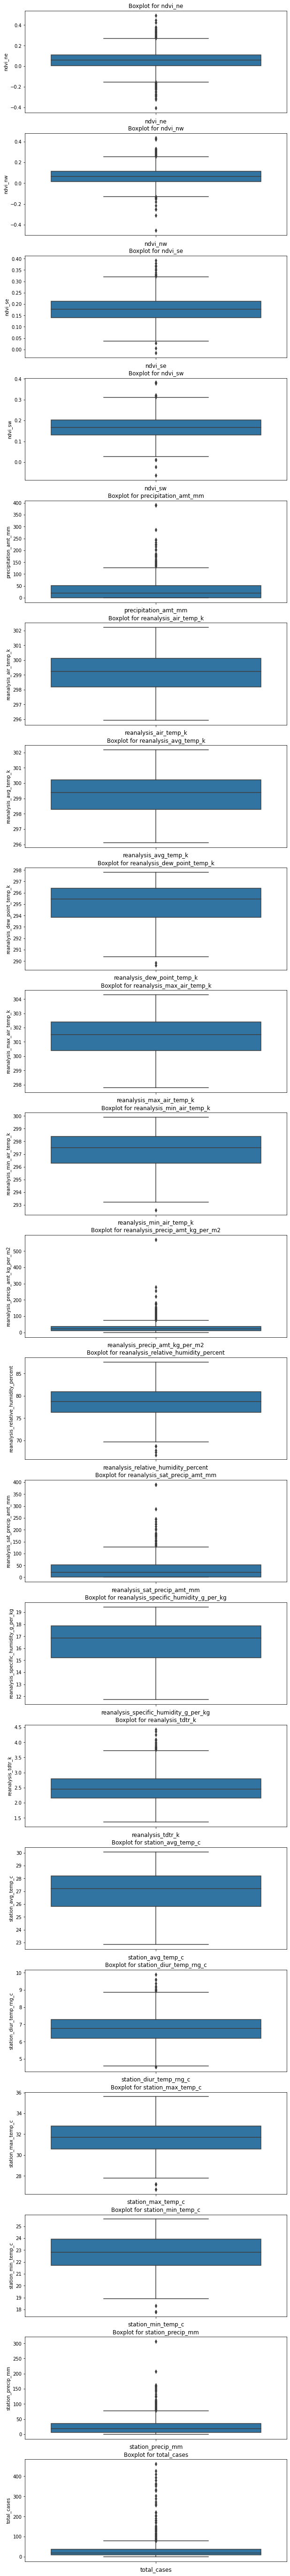

In [ ]:
#Checking for outliers
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
        'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
        'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
        'reanalysis_precip_amt_kg_per_m2',
        'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
        'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
        'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
        'station_min_temp_c', 'station_precip_mm', 'total_cases']

fig, axs = plt.subplots(len(cols), figsize=(10,100))

for i, col_val in enumerate(cols):
    sns.boxplot(y=dengue_sj[col_val], ax=axs[i])
    axs[i].set_title('Boxplot for '+col_val, fontsize=12)
    axs[i].set_xlabel(col_val, fontsize=12)


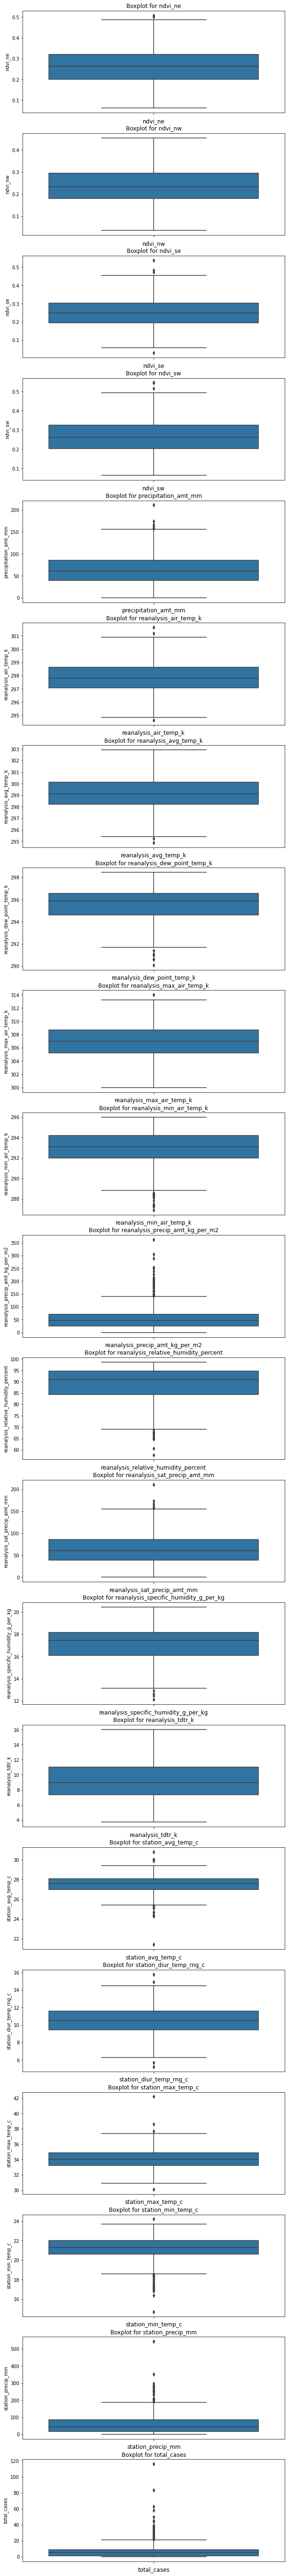

In [ ]:

cols = ['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
        'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
        'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
        'reanalysis_precip_amt_kg_per_m2',
        'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
        'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
        'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
        'station_min_temp_c', 'station_precip_mm', 'total_cases']

fig, axs = plt.subplots(len(cols), figsize=(10,100))

for i, col_val in enumerate(cols):
    sns.boxplot(y=dengue_iq[col_val], ax=axs[i])
    axs[i].set_title('Boxplot for '+col_val, fontsize=12)
    axs[i].set_xlabel(col_val, fontsize=12)

## Exploratory Data Analysis

## Univariate Analysis

### San Juan, Puerto Rico

#### Measures of Central Tendency

In [34]:
df1=dengue_sj[cols]
df1.head()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [36]:
# Mean
df1.mean()

ndvi_ne                                    0.058096
ndvi_nw                                    0.066264
ndvi_se                                    0.177090
ndvi_sw                                    0.166088
precipitation_amt_mm                      35.385304
reanalysis_air_temp_k                    299.157295
reanalysis_avg_temp_k                    299.270520
reanalysis_dew_point_temp_k              295.103507
reanalysis_max_air_temp_k                301.391506
reanalysis_min_air_temp_k                297.297222
reanalysis_precip_amt_kg_per_m2           30.423622
reanalysis_relative_humidity_percent      78.568907
reanalysis_sat_precip_amt_mm              35.385304
reanalysis_specific_humidity_g_per_kg     16.546255
reanalysis_tdtr_k                          2.514225
station_avg_temp_c                        26.997940
station_diur_temp_rng_c                    6.753892
station_max_temp_c                        31.596207
station_min_temp_c                        22.593803
station_prec

In [38]:
# Median
df1.median()

ndvi_ne                                    0.058129
ndvi_nw                                    0.065950
ndvi_se                                    0.176523
ndvi_sw                                    0.166900
precipitation_amt_mm                      20.775000
reanalysis_air_temp_k                    299.239286
reanalysis_avg_temp_k                    299.378571
reanalysis_dew_point_temp_k              295.447143
reanalysis_max_air_temp_k                301.500000
reanalysis_min_air_temp_k                297.500000
reanalysis_precip_amt_kg_per_m2           21.300000
reanalysis_relative_humidity_percent      78.670714
reanalysis_sat_precip_amt_mm              20.775000
reanalysis_specific_humidity_g_per_kg     16.832143
reanalysis_tdtr_k                          2.450000
station_avg_temp_c                        27.214286
station_diur_temp_rng_c                    6.757143
station_max_temp_c                        31.700000
station_min_temp_c                        22.800000
station_prec

In [43]:
# Mode
for column in df1:
  columncontent = df1[column]
  if column in cols:
    print('column name', column)
    print('Column mode', columncontent.mode())
    print('\n') 


column name ndvi_ne
Column mode 0   -0.0479
1    0.0455
2    0.0802
3    0.0969
dtype: float64


column name ndvi_nw
Column mode 0    0.02780
1    0.07825
2    0.11270
dtype: float64


column name ndvi_se
Column mode 0     0.088214
1     0.124657
2     0.137757
3     0.138743
4     0.146343
5     0.146657
6     0.151500
7     0.152729
8     0.157200
9     0.165086
10    0.173671
11    0.177300
12    0.188629
13    0.196729
14    0.198483
15    0.204714
16    0.215317
17    0.215414
18    0.220229
19    0.223371
20    0.254571
dtype: float64


column name ndvi_sw
Column mode 0    0.168871
dtype: float64


column name precipitation_amt_mm
Column mode 0    0.0
dtype: float64


column name reanalysis_air_temp_k
Column mode 0    299.885714
dtype: float64


column name reanalysis_avg_temp_k
Column mode 0    299.842857
1    300.035714
dtype: float64


column name reanalysis_dew_point_temp_k
Column mode 0    293.270000
1    293.532857
2    295.871429
3    295.875714
4    296.397143
5    296.41

In [44]:
# Kurtosis
df1.kurt()

ndvi_ne                                   2.041212
ndvi_nw                                   2.087599
ndvi_se                                   0.446162
ndvi_sw                                   0.670556
precipitation_amt_mm                     11.780876
reanalysis_air_temp_k                    -0.879625
reanalysis_avg_temp_k                    -0.823004
reanalysis_dew_point_temp_k              -0.402427
reanalysis_max_air_temp_k                -0.787288
reanalysis_min_air_temp_k                -0.301265
reanalysis_precip_amt_kg_per_m2          63.109182
reanalysis_relative_humidity_percent     -0.059543
reanalysis_sat_precip_amt_mm             11.780876
reanalysis_specific_humidity_g_per_kg    -0.736853
reanalysis_tdtr_k                         0.393500
station_avg_temp_c                       -0.906049
station_diur_temp_rng_c                   0.478430
station_max_temp_c                       -0.545335
station_min_temp_c                       -0.472060
station_precip_mm              

In [45]:
# Skewness
df1.skew()

ndvi_ne                                 -0.016260
ndvi_nw                                 -0.072641
ndvi_se                                  0.229746
ndvi_sw                                  0.131393
precipitation_amt_mm                     2.614644
reanalysis_air_temp_k                   -0.209668
reanalysis_avg_temp_k                   -0.216262
reanalysis_dew_point_temp_k             -0.616837
reanalysis_max_air_temp_k               -0.149744
reanalysis_min_air_temp_k               -0.530607
reanalysis_precip_amt_kg_per_m2          5.585223
reanalysis_relative_humidity_percent    -0.193633
reanalysis_sat_precip_amt_mm             2.614644
reanalysis_specific_humidity_g_per_kg   -0.459450
reanalysis_tdtr_k                        0.690128
station_avg_temp_c                      -0.297280
station_diur_temp_rng_c                  0.107917
station_max_temp_c                      -0.426209
station_min_temp_c                      -0.383591
station_precip_mm                        2.636947


In [47]:
# standard deviation
df1.std()

ndvi_ne                                   0.102660
ndvi_nw                                   0.091292
ndvi_se                                   0.056926
ndvi_sw                                   0.055776
precipitation_amt_mm                     44.528272
reanalysis_air_temp_k                     1.236323
reanalysis_avg_temp_k                     1.218688
reanalysis_dew_point_temp_k               1.567907
reanalysis_max_air_temp_k                 1.259365
reanalysis_min_air_temp_k                 1.293459
reanalysis_precip_amt_kg_per_m2          35.522802
reanalysis_relative_humidity_percent      3.380444
reanalysis_sat_precip_amt_mm             44.528272
reanalysis_specific_humidity_g_per_kg     1.558857
reanalysis_tdtr_k                         0.498134
station_avg_temp_c                        1.415530
station_diur_temp_rng_c                   0.835684
station_max_temp_c                        1.719618
station_min_temp_c                        1.505416
station_precip_mm              

In [48]:
# Variance
df1.var()

ndvi_ne                                     0.010539
ndvi_nw                                     0.008334
ndvi_se                                     0.003241
ndvi_sw                                     0.003111
precipitation_amt_mm                     1982.766991
reanalysis_air_temp_k                       1.528494
reanalysis_avg_temp_k                       1.485200
reanalysis_dew_point_temp_k                 2.458332
reanalysis_max_air_temp_k                   1.586000
reanalysis_min_air_temp_k                   1.673035
reanalysis_precip_amt_kg_per_m2          1261.869436
reanalysis_relative_humidity_percent       11.427398
reanalysis_sat_precip_amt_mm             1982.766991
reanalysis_specific_humidity_g_per_kg       2.430036
reanalysis_tdtr_k                           0.248138
station_avg_temp_c                          2.003725
station_diur_temp_rng_c                     0.698368
station_max_temp_c                          2.957085
station_min_temp_c                          2.

In [49]:
# Summary statistics
df1.describe()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,0.058096,0.066264,0.177090,0.166088,35.385304,299.157295,299.270520,295.103507,301.391506,297.297222,30.423622,78.568907,35.385304,16.546255,2.514225,26.997940,6.753892,31.596207,22.593803,26.778846,34.180556
std,0.102660,0.091292,0.056926,0.055776,44.528272,1.236323,1.218688,1.567907,1.259365,1.293459,35.522802,3.380444,44.528272,1.558857,0.498134,1.415530,0.835684,1.719618,1.505416,29.241411,51.381372
min,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,295.938571,296.114286,289.642857,297.800000,292.600000,0.000000,66.735714,0.000000,11.715714,1.357143,22.842857,4.528571,26.700000,17.800000,0.000000,0.000000
25%,0.004267,0.016487,0.138936,0.129457,0.000000,298.190714,298.291071,293.832857,300.400000,296.300000,10.900000,76.246786,0.000000,15.225714,2.157143,25.814286,6.200000,30.600000,21.700000,6.900000,9.000000
50%,0.058129,0.065950,0.176523,0.166900,20.775000,299.239286,299.378571,295.447143,301.500000,297.500000,21.300000,78.670714,20.775000,16.832143,2.450000,27.214286,6.757143,31.700000,22.800000,17.800000,19.000000
75%,0.111223,0.113512,0.211596,0.202264,52.125000,300.130714,300.223214,296.415714,302.400000,298.400000,36.925000,80.947143,52.125000,17.854286,2.789286,28.175000,7.285714,32.800000,23.900000,35.525000,37.000000
max,0.493400,0.437100,0.393129,0.381420,390.600000,302.200000,302.164286,297.795714,304.300000,299.900000,570.500000,87.575714,390.600000,19.440000,4.428571,30.071429,9.914286,35.600000,25.600000,305.900000,461.000000


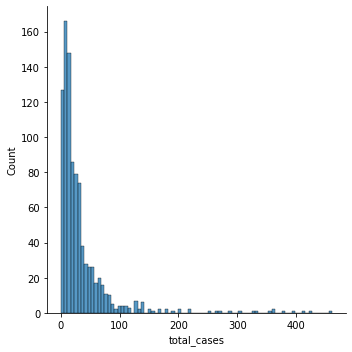

In [28]:
# Histogram showing distribution of cases
sns.displot(dengue_sj.total_cases, kde=False);

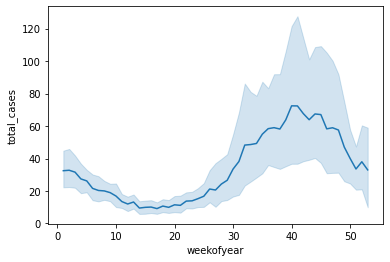

In [29]:
# Plotting cases over time
sns.lineplot(x='weekofyear', y='total_cases', data=dengue_sj)